# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></div><div class="lev1 toc-item"><a href="#Part-1A:" data-toc-modified-id="Part-1A:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 1A:</a></div><div class="lev1 toc-item"><a href="#Part-1B:" data-toc-modified-id="Part-1B:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 1B:</a></div><div class="lev1 toc-item"><a href="#Part-1C:" data-toc-modified-id="Part-1C:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part 1C:</a></div><div class="lev1 toc-item"><a href="#Part-1D:" data-toc-modified-id="Part-1D:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Part 1D:</a></div><div class="lev1 toc-item"><a href="#Part-1E" data-toc-modified-id="Part-1E-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part 1E</a></div><div class="lev1 toc-item"><a href="#1E-Explanation:" data-toc-modified-id="1E-Explanation:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>1E Explanation:</a></div><div class="lev1 toc-item"><a href="#Question-2:" data-toc-modified-id="Question-2:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Question 2:</a></div><div class="lev1 toc-item"><a href="#Part-2A" data-toc-modified-id="Part-2A-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Part 2A</a></div><div class="lev1 toc-item"><a href="#Part-2B" data-toc-modified-id="Part-2B-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Part 2B</a></div><div class="lev1 toc-item"><a href="#Part-2C" data-toc-modified-id="Part-2C-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Part 2C</a></div>

KT:  Look at you, Mr. Fancy Pants with your hyperlinking. +0.1 bonus because that's cool.

# Question 1

$$\require{mhchem}$$ 

We want to oxidize CO to $\ce{CO2}$ with the reaction: \begin{align} \ce{CO + 1/2O2 -> CO2} \end{align} The rate is assumed to follow Hougen-Watson kinetics of the form \begin{align} r=\frac{k C{CO}C{O2}}{1+KC_{CO}} \end{align} with $k=9.73\times 10^{12} \exp^{-13,500/T}$ cm$^6$/mol$\cdot s\cdot(g_{catalyst})$ and $K=8.099\times 10^6\exp^{409/T}$ cm$^3$/mol, where $T$ is in Kelvin. The feed to the reactor is 2 mol% $\ce{CO}$, 10 mol% $\ce{O2}$, and the rest inert. Total inlet pressure is 6 atm, and total inlet molar flow rate is 0.1 mol/s. The reactor operates isothermally at 838 K. The catalyst packed bed can be modeled with an effective $\alpha=0.00004$/(g catalyst).

# Part 1A:

Yes, the flowrate to the packed bed reactor does affect the final conversion. This is because flowrate is linked to the retention time (time spent by reactants in the reactor interacting with themselves or with the catalyst). A high flowrate would mean a lower retention time and hence a lower conversion.

# Part 1B: 

In [1]:
#shorthand: CO = A, O2 = B, CO2 = C, Inert = I

Ft0 = 0.1 #mol / s
Fa0 = 0.02 * Ft0 #mol / s
Fb0 = 0.1 * Ft0 #mol / s
Fc0 = 0
FI0 = 0.88 * Ft0 #mol / s

T = 838 #K
Pt0 = 6 #atm
R = 82.057 #cm3.atm/(K.mol)

# PV = ZnRT
# Cx = Fx/v

Ct0 = Pt0 / ( R * T)
v0 = Ft0 / Ct0

Ca0 = Fa0 / v0
Cb0 = Fb0 / v0
Cc0 = Fc0 / v0
CI0 = FI0 / v0

print ("For a flow rate Ft0 = 0.1mol/s, the inlet flowrates of A,B,C,I are:", "%.4f" %Fa0,"%.4f" %Fb0,"%.4f" %Fc0,"%.4f" %FI0, "mol/s respectively")
print ("Volumetric flowrate at inlet is ", v0, "cm3/s")
print ("The inlet concentrations of A,B,C,I are as follows:","%.7f" %Ca0,"%.7f" %Cb0,"%.7f" %Cc0,"%.7f" %CI0, "mol/cm3 in that order")

For a flow rate Ft0 = 0.1mol/s, the inlet flowrates of A,B,C,I are: 0.0020 0.0100 0.0000 0.0880 mol/s respectively
Volumetric flowrate at inlet is  1146.0627666666667 cm3/s
The inlet concentrations of A,B,C,I are as follows: 0.0000017 0.0000087 0.0000000 0.0000768 mol/cm3 in that order


# Part 1C:

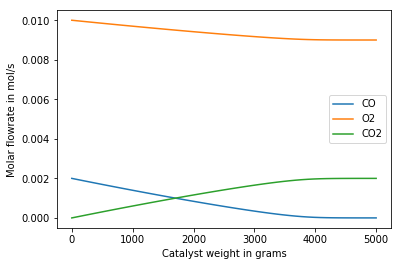

In [2]:
import numpy as np
from scipy.integrate import odeint
#shorthand: CO = A, O2 = B, CO2 = C, Inert = I

Ft0 = 0.1 #mol / s
Fa0 = 0.02 * Ft0 #mol / s
Fb0 = 0.1 * Ft0 #mol / s
Fc0 = 0
FI0 = 0.88 * Ft0 #mol / s


T = 838 #K
Pt0 = 6 #atm
R = 82.057 #cm3.atm/(K.mol)

# PV = ZnRT
# Cx = Fx/v

Ct0 = Pt0 / ( R * T)
v0 = Ft0 / Ct0

Ca0 = Fa0 / v0
Cb0 = Fb0 / v0
Cc0 = Fc0 / v0
CI0 = FI0 / v0

K = 8.099 * 10**6 * np.exp(409/T) #cm3/mol
k = 9.73 * 10**12 * np.exp(13500/-T) # cm6/(mol.s.gcatalyst)
alpha = 0.00004 #/g(catalyst)

def dfdw (F,W):
    Fa, Fb, Fc, y = F
    Ft = Fa + Fb + Fc + FI0
    
    Pt = y * Pt0
    Pa = Fa / Ft * Pt
    Pb = Fb / Ft * Pt
    Pc = Fc / Ft * Pt
    
    Ca = Pa / (R*T)
    Cb = Pb / (R*T)
    Cc = Pc / (R*T)
    
    r = (k * Ca * Cb)/(1 + K * Ca)
    
    dFadW = ra = -1 * r
    dFbdW = rb = -0.5 * r
    dFcdW = rc = 1 * r
    dydW = -alpha / (2 * y) * Ft / Ft0

    return [dFadW, dFbdW, dFcdW, dydW]

y0 = 1.0 
F0 = [Fa0, Fb0, Fc0, y0]
Wspan = np.linspace(0,5000)

ans = odeint(dfdw, F0, Wspan)

Faarr = ans[:,0]
Fbarr = ans[:,1]
Fcarr = ans[:,2]

X = (Faarr[-1]-Fa0)/-Fa0
#print (X)
import matplotlib.pyplot as plt

plt.plot (Wspan,Faarr,Wspan,Fbarr,Wspan,Fcarr)
plt.legend(['CO','O2','CO2'])
plt.xlabel('Catalyst weight in grams')
plt.ylabel('Molar flowrate in mol/s')
plt.show()

KT:  You forgot the pressure plot :(

-1 point

# Part 1D:

The reactor outlet is collected in an unpressured tank at 1.0 atm. Determine the inlet pressure necessary to operate a reactor with 5 kg of catalyst such that the outlet pressure is 1 atm. (2 pt)

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
#shorthand: CO = A, O2 = B, CO2 = C, Inert = I

def PBR (Pt0):
    Ft0 = 0.1 #mol / s
    Fa0 = 0.02 * Ft0 #mol / s
    Fb0 = 0.1 * Ft0 #mol / s
    Fc0 = 0
    FI0 = 0.88 * Ft0 #mol / s


    T = 838 #K
    R = 82.057 #cm3.atm/(K.mol)

    # PV = ZnRT
    # Cx = Fx/v

    Ct0 = Pt0 / ( R * T)
    v0 = Ft0 / Ct0

    Ca0 = Fa0 / v0
    Cb0 = Fb0 / v0
    Cc0 = Fc0 / v0
    CI0 = FI0 / v0

    K = 8.099 * 10**6 * np.exp(409/T) #cm3/mol
    k = 9.73 * 10**12 * np.exp(13500/-T) # cm6/(mol.s.gcatalyst)
    alpha = 0.00004 #/g(catalyst)

    def dfdw (F,W):
        Fa, Fb, Fc, y = F
        Ft = Fa + Fb + Fc + FI0

        Pt = y * Pt0
        Pa = Fa / Ft * Pt
        Pb = Fb / Ft * Pt
        Pc = Fc / Ft * Pt

        Ca = Pa / (R*T)
        Cb = Pb / (R*T)
        Cc = Pc / (R*T)

        r = (k * Ca * Cb)/(1 + K * Ca)

        dFadW = ra = -1 * r
        dFbdW = rb = -0.5 * r
        dFcdW = rc = 1 * r
        dydW = -alpha / (2 * y) * Ft / Ft0

        return [dFadW, dFbdW, dFcdW, dydW]

    y0 = 1.0 
    F0 = [Fa0, Fb0, Fc0, y0]
    Wspan = np.linspace(0,5000)

    ans1 = odeint(dfdw, F0, Wspan)

    Faarr = ans1[:,0]
    Fbarr = ans1[:,1]
    Fcarr = ans1[:,2]
    
    Faout = Faarr[-1]
    Fbout = Faarr[-1]
    Fcout = Faarr[-1]
    Ftout = Faout + Fbout + Fcout + FI0
    
    Ptout = Ftout / Ft0 * Pt0
    
    return Ptout-1 #outlet pressure is 1atm

Ptin = fsolve(PBR,1)
print ("The inlet total pressure required so that output is at 1atm is:", Ptin[0])

The inlet total pressure required so that output is at 1atm is: 1.07847808411


KT:  Close; the actual answer is ~1.18 atm.

-0.5 points

# Part 1E

Before acquiring a new packed bed reactor, you realize that you already have a PBR that holds 50 kg of catalyst. Plot the molar flow rates and pressure for each species along the length of this new reactor. Discuss the behavior and describe where the model is breaking down. (3 pt)

/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


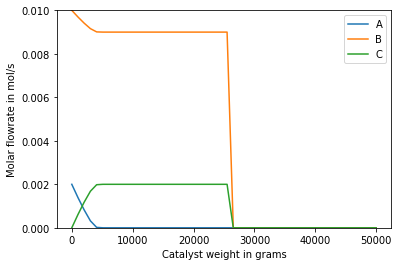

In [10]:
import numpy as np
from scipy.integrate import odeint
#shorthand: CO = A, O2 = B, CO2 = C, Inert = I

Ft0 = 0.1 #mol / s
Fa0 = 0.02 * Ft0 #mol / s
Fb0 = 0.1 * Ft0 #mol / s
Fc0 = 0
FI0 = 0.88 * Ft0 #mol / s


T = 838 #K
Pt0 = 6 #atm
R = 82.057 #cm3.atm/(K.mol)

# PV = ZnRT
# Cx = Fx/v

Ct0 = Pt0 / ( R * T)
v0 = Ft0 / Ct0

Ca0 = Fa0 / v0
Cb0 = Fb0 / v0
Cc0 = Fc0 / v0
CI0 = FI0 / v0

K = 8.099 * 10**6 * np.exp(409/T) #cm3/mol
k = 9.73 * 10**12 * np.exp(13500/-T) # cm6/(mol.s.gcatalyst)
alpha = 0.00004 #/g(catalyst)

def dfdw (F,W):
    Fa, Fb, Fc, y = F
    Ft = Fa + Fb + Fc + FI0
    
    Pt = y * Pt0
    Pa = Fa / Ft * Pt
    Pb = Fb / Ft * Pt
    Pc = Fc / Ft * Pt
    
    Ca = Pa / (R*T)
    Cb = Pb / (R*T)
    Cc = Pc / (R*T)
    
    r = (k * Ca * Cb)/(1 + K * Ca)
    
    dFadW = ra = -1 * r
    dFbdW = rb = -0.5 * r
    dFcdW = rc = 1 * r
    dydW = -alpha / (2 * y) * Ft / Ft0

    return [dFadW, dFbdW, dFcdW, dydW]

y0 = 1.0 
F0 = [Fa0, Fb0, Fc0, y0]
Wspan = np.linspace(0,50000)

ans = odeint(dfdw, F0, Wspan)

Faarr = ans[:,0]
Fbarr = ans[:,1]
Fcarr = ans[:,2]

import matplotlib.pyplot as plt

plt.plot (Wspan,Faarr,Wspan,Fbarr,Wspan,Fcarr)
plt.legend(['A','B','C'])
plt.xlabel('Catalyst weight in grams')
plt.ylabel('Molar flowrate in mol/s')
plt.ylim([0, 0.01])
plt.show()

# 1E Explanation:

ODEINT is not a blackbox. It runs a solver known as lsoda, which is essentially an extension of the Runge Kutta algorithm for stiff and non-stiff systems. However, lsoda requires that the Jacobian be dense. In this case, we can see that the reaction reaches equillibrium at w~4000. As a result, the matrix corresponding to the set of differential equations thus generated as a part of lsoda is sparse. Evidently, the Jacobian of the matrix is sparse and hence we lsoda breaks down, giving us a runtime warning.

(Ref: LSODA documentation: http://www.oecd-nea.org/tools/abstract/detail/uscd1227)

KT:  No pressure plot

-1 point

# Question 2:

We have a 20 L transient CSTR, with the following reactions: \begin{align} \ce{A&->[k_1] X}\ \\ \ce{2X + Y &->[k_2] 3 X}\ \\\ce{B + X &->[k_3] Y + D}\ \\\ce{X &->[k_4] E} \end{align} The initial concentration for A is 1 M, B is 3 M, X and Y are 0.01 M. The initial concentration for D and E are 0 M. The rate constants are $k_1=0.1\:s^{-1}$, $k_2=10^5 M^{-2}s^{-1}$, $k_3=10\: M^{-1}s^{-1}$ and $k_4=10\:s^{-1}$

# Part 2A

The operators report that when they load the initial batch into the reactor they observe some strange behavior, even without an inflow or outflow into the CSTR. First, calculate the concentration profiles for all of the species for the first 30 seconds after loading the CSTR, using a logarithmic y-axis. (4 pt)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


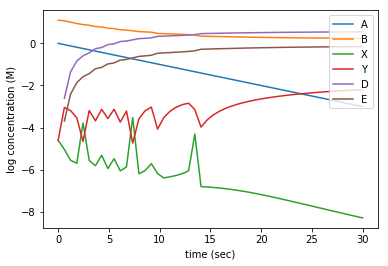

In [5]:
import numpy as np
from scipy.integrate import odeint
Ca0 = 1 #molar
Cb0 = 3 #molar
Cx0 = 0.01 #molar
Cy0 = 0.01 #molar
Cd0 = 0
Ce0 = 0


C0 = [Ca0,Cb0,Cx0,Cy0,Cd0,Ce0]
k1 = 0.1 #s-1
k2 = 10 ** 5 #M-2.s-1
k3 = 10 #M-1.s-1
k4 = 10 #s-1

V = 10 #L

# For initial 30 seconds with no inflow or outflow, we can assume the system to be a batch reactor

def dCdt (C,t):
    Ca,Cb,Cx,Cy,Cd,Ce = C
    
    r1 = k1 * Ca
    r2 = k2 * (Cx ** 2) * Cy
    r3 = k3 * Cb * Cx
    r4 = k4 * Cx
    
    dCadt = ra = -r1
    dCbdt = rb = -r3
    dCxdt = rx = r1 - 2*r2 + 3*r2 - r3 - r4
    dCydt = ry = -r2 + r3
    dCddt = rd = r3
    dCedt = re = r4
    
    return [ra,rb,rx,ry,rd,re]

tspan = np.linspace(0,30)

ans = odeint (dCdt,C0,tspan)

Caarr = ans[:,0]
Cbarr = ans[:,1]
Cxarr = ans[:,2]
Cyarr = ans[:,3]
Cdarr = ans[:,4]
Cearr = ans[:,5]

import matplotlib.pyplot as plt
#plt.plot(tspan,Cxarr,tspan,Cyarr)
plt.plot(tspan,np.log(Caarr),tspan,np.log(Cbarr),tspan,np.log(Cxarr),tspan,np.log(Cyarr),tspan,np.log(Cdarr),tspan,np.log(Cearr))
plt.legend (['A','B','X','Y','D','E'],loc=1)
plt.xlabel('time (sec)')
plt.ylabel('log concentration (M)')

plt.show()

# Part 2B

You suggest that the stability of the system can be improved by using a suitably large inflow/outflow to the CSTR to force it into a stable trajectory. For an inlet stream of 50 L/s with 1 M A and 1 M B, calculate the new startup concentration profile. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log


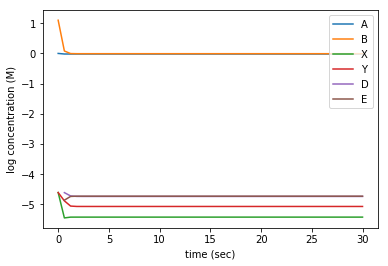

In [6]:
import numpy as np
from scipy.integrate import odeint
Ca0 = 1 #molar
Cb0 = 3 #molar
Cx0 = 0.01 #molar
Cy0 = 0.01 #molar
Cd0 = 0
Ce0 = 0
C0 = [Ca0,Cb0,Cx0,Cy0,Cd0,Ce0]

v0=50 #l/s
Cain = 1 #molar
Cbin = 1 #molar

Fain = Cain * v0
Fbin = Cbin * v0
Fxin = 0
Fyin = 0
Fdin = 0
Fein = 0

k1 = 0.1 #s-1
k2 = 10 ** 5 #M-2.s-1
k3 = 10 #M-1.s-1
k4 = 10 #s-1

V = 10 #L

#Do we consider volumetric flowrate to be constant???

def dCdt (C,t):
    Ca,Cb,Cx,Cy,Cd,Ce = C
    
    r1 = k1 * Ca
    r2 = k2 * (Cx ** 2) * Cy
    r3 = k3 * Cb * Cx
    r4 = k4 * Cx
    
    ra = -r1
    rb = -r3
    rx = r1 - 2*r2 + 3*r2 - r3 - r4
    ry = -r2 + r3
    rd = r3
    re = r4
    
    Fa = v0 * Ca
    Fb = v0 * Cb
    Fx = v0 * Cx
    Fy = v0 * Cy
    Fd = v0 * Cd
    Fe = v0 * Ce
    
    dcadt = Fain / V - Fa / V + ra
    dcbdt = Fbin / V - Fb / V + rb
    dcxdt = Fxin / V - Fx / V + rx
    dcydt = Fyin / V - Fy / V + ry
    dcddt = Fdin / V - Fd / V + rd
    dcedt = Fein / V - Fe / V + re
    
    return [dcadt,dcbdt,dcxdt,dcydt,dcddt,dcedt,]

tspan = np.linspace(0,30)

ans = odeint (dCdt,C0,tspan)

Caarr = ans[:,0]
Cbarr = ans[:,1]
Cxarr = ans[:,2]
Cyarr = ans[:,3]
Cdarr = ans[:,4]
Cearr = ans[:,5]

import matplotlib.pyplot as plt
##plt.plot(tspan,Cxarr,tspan,Cyarr)
plt.plot(tspan,np.log(Caarr),tspan,np.log(Cbarr),tspan,np.log(Cxarr),tspan,np.log(Cyarr),tspan,np.log(Cdarr),tspan,np.log(Cearr))
plt.legend (['A','B','X','Y','D','E'],loc=1)
plt.xlabel('time (sec)')
plt.ylabel('log concentration (M)')

plt.show()

KT:  Seems a little off. Check the answer key.

-1 point

# Part 2C

Simply reducing the starting concentration of B should be enough. Find a concentration of B such that X decreases monotonically during startup. (2 pt)

The value of initial concentration of B for which concentration of X is monotonically decreasing is: 9.30000 M


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log


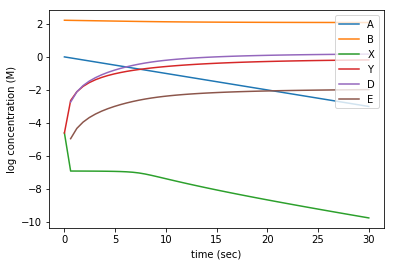

In [7]:
# we want to find the least value of Cb0 for which 
import numpy as np
from scipy.integrate import odeint

B=3

while (1):
        
    Ca0 = 1 #molar
    Cb0 = B #molar
    Cx0 = 0.01 #molar
    Cy0 = 0.01 #molar
    Cd0 = 0
    Ce0 = 0


    C0 = [Ca0,Cb0,Cx0,Cy0,Cd0,Ce0] #taking -1 as initial value for dcx/dt
    k1 = 0.1 #s-1
    k2 = 10 ** 5 #M-2.s-1
    k3 = 10 #M-1.s-1
    k4 = 10 #s-1

    V = 10 #L

    def dCdt (C,t):
        Ca,Cb,Cx,Cy,Cd,Ce = C

        r1 = k1 * Ca
        r2 = k2 * (Cx ** 2) * Cy
        r3 = k3 * Cb * Cx
        r4 = k4 * Cx

        dCadt = ra = -r1
        dCbdt = rb = -r3
        dCxdt = rx = r1 - 2*r2 + 3*r2 - r3 - r4
        dCydt = ry = -r2 + r3
        dCddt = rd = r3
        dCedt = re = r4
        #print (dCxdt)
        return [ra,rb,rx,ry,rd,re]

    tspan = np.linspace(0,30)

    ans = odeint (dCdt,C0,tspan)

    Caarr = ans[:,0]
    Cbarr = ans[:,1]
    Cxarr = ans[:,2]
    Cyarr = ans[:,3]
    Cdarr = ans[:,4]
    Cearr = ans[:,5]

    Cxdiff = np.diff(Cxarr) #discrete difference between elements of Cx array
    #print (Cxdiff,'\n\n')
    B=B+.1
    if all(t < 0 for t in Cxdiff):
        break
print ("The value of initial concentration of B for which concentration of X is monotonically decreasing is:","%.5f"%B,"M")


import matplotlib.pyplot as plt
#plt.plot(tspan,Cxarr,tspan,Cyarr)
plt.plot(tspan,np.log(Caarr),tspan,np.log(Cbarr),tspan,np.log(Cxarr),tspan,np.log(Cyarr),tspan,np.log(Cdarr),tspan,np.log(Cearr))
plt.legend (['A','B','X','Y','D','E'],loc=1)
plt.xlabel('time (sec)')
plt.ylabel('log concentration (M)')

plt.show()
